In [1]:
from sympy import *
import numpy as np
import pandas as pd
import seaborn as sns
init_printing()
from matplotlib.pyplot import (figure, title, subplot, plot, hist, show, 
                               xlabel, ylabel, xticks, yticks, colorbar, cm, 
                               imshow, suptitle, boxplot, ylim, legend, xlim)
from scipy.io import loadmat
import scipy.linalg as linalg

In [2]:
doc = pd.read_csv("sd-data_raw.csv")
doc.head()


sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

In [3]:
# Variable names
attributeNames = np.asarray(doc.columns)

# Convert Y to 1 and N to 0 in last column
doc = doc.replace(to_replace = "Y", value = 1)
doc = doc.replace(to_replace = "N", value = 0)


In [4]:
# Are there issues with outliers in the data?

In [5]:
# Do the attributes seem to be normally distributed?


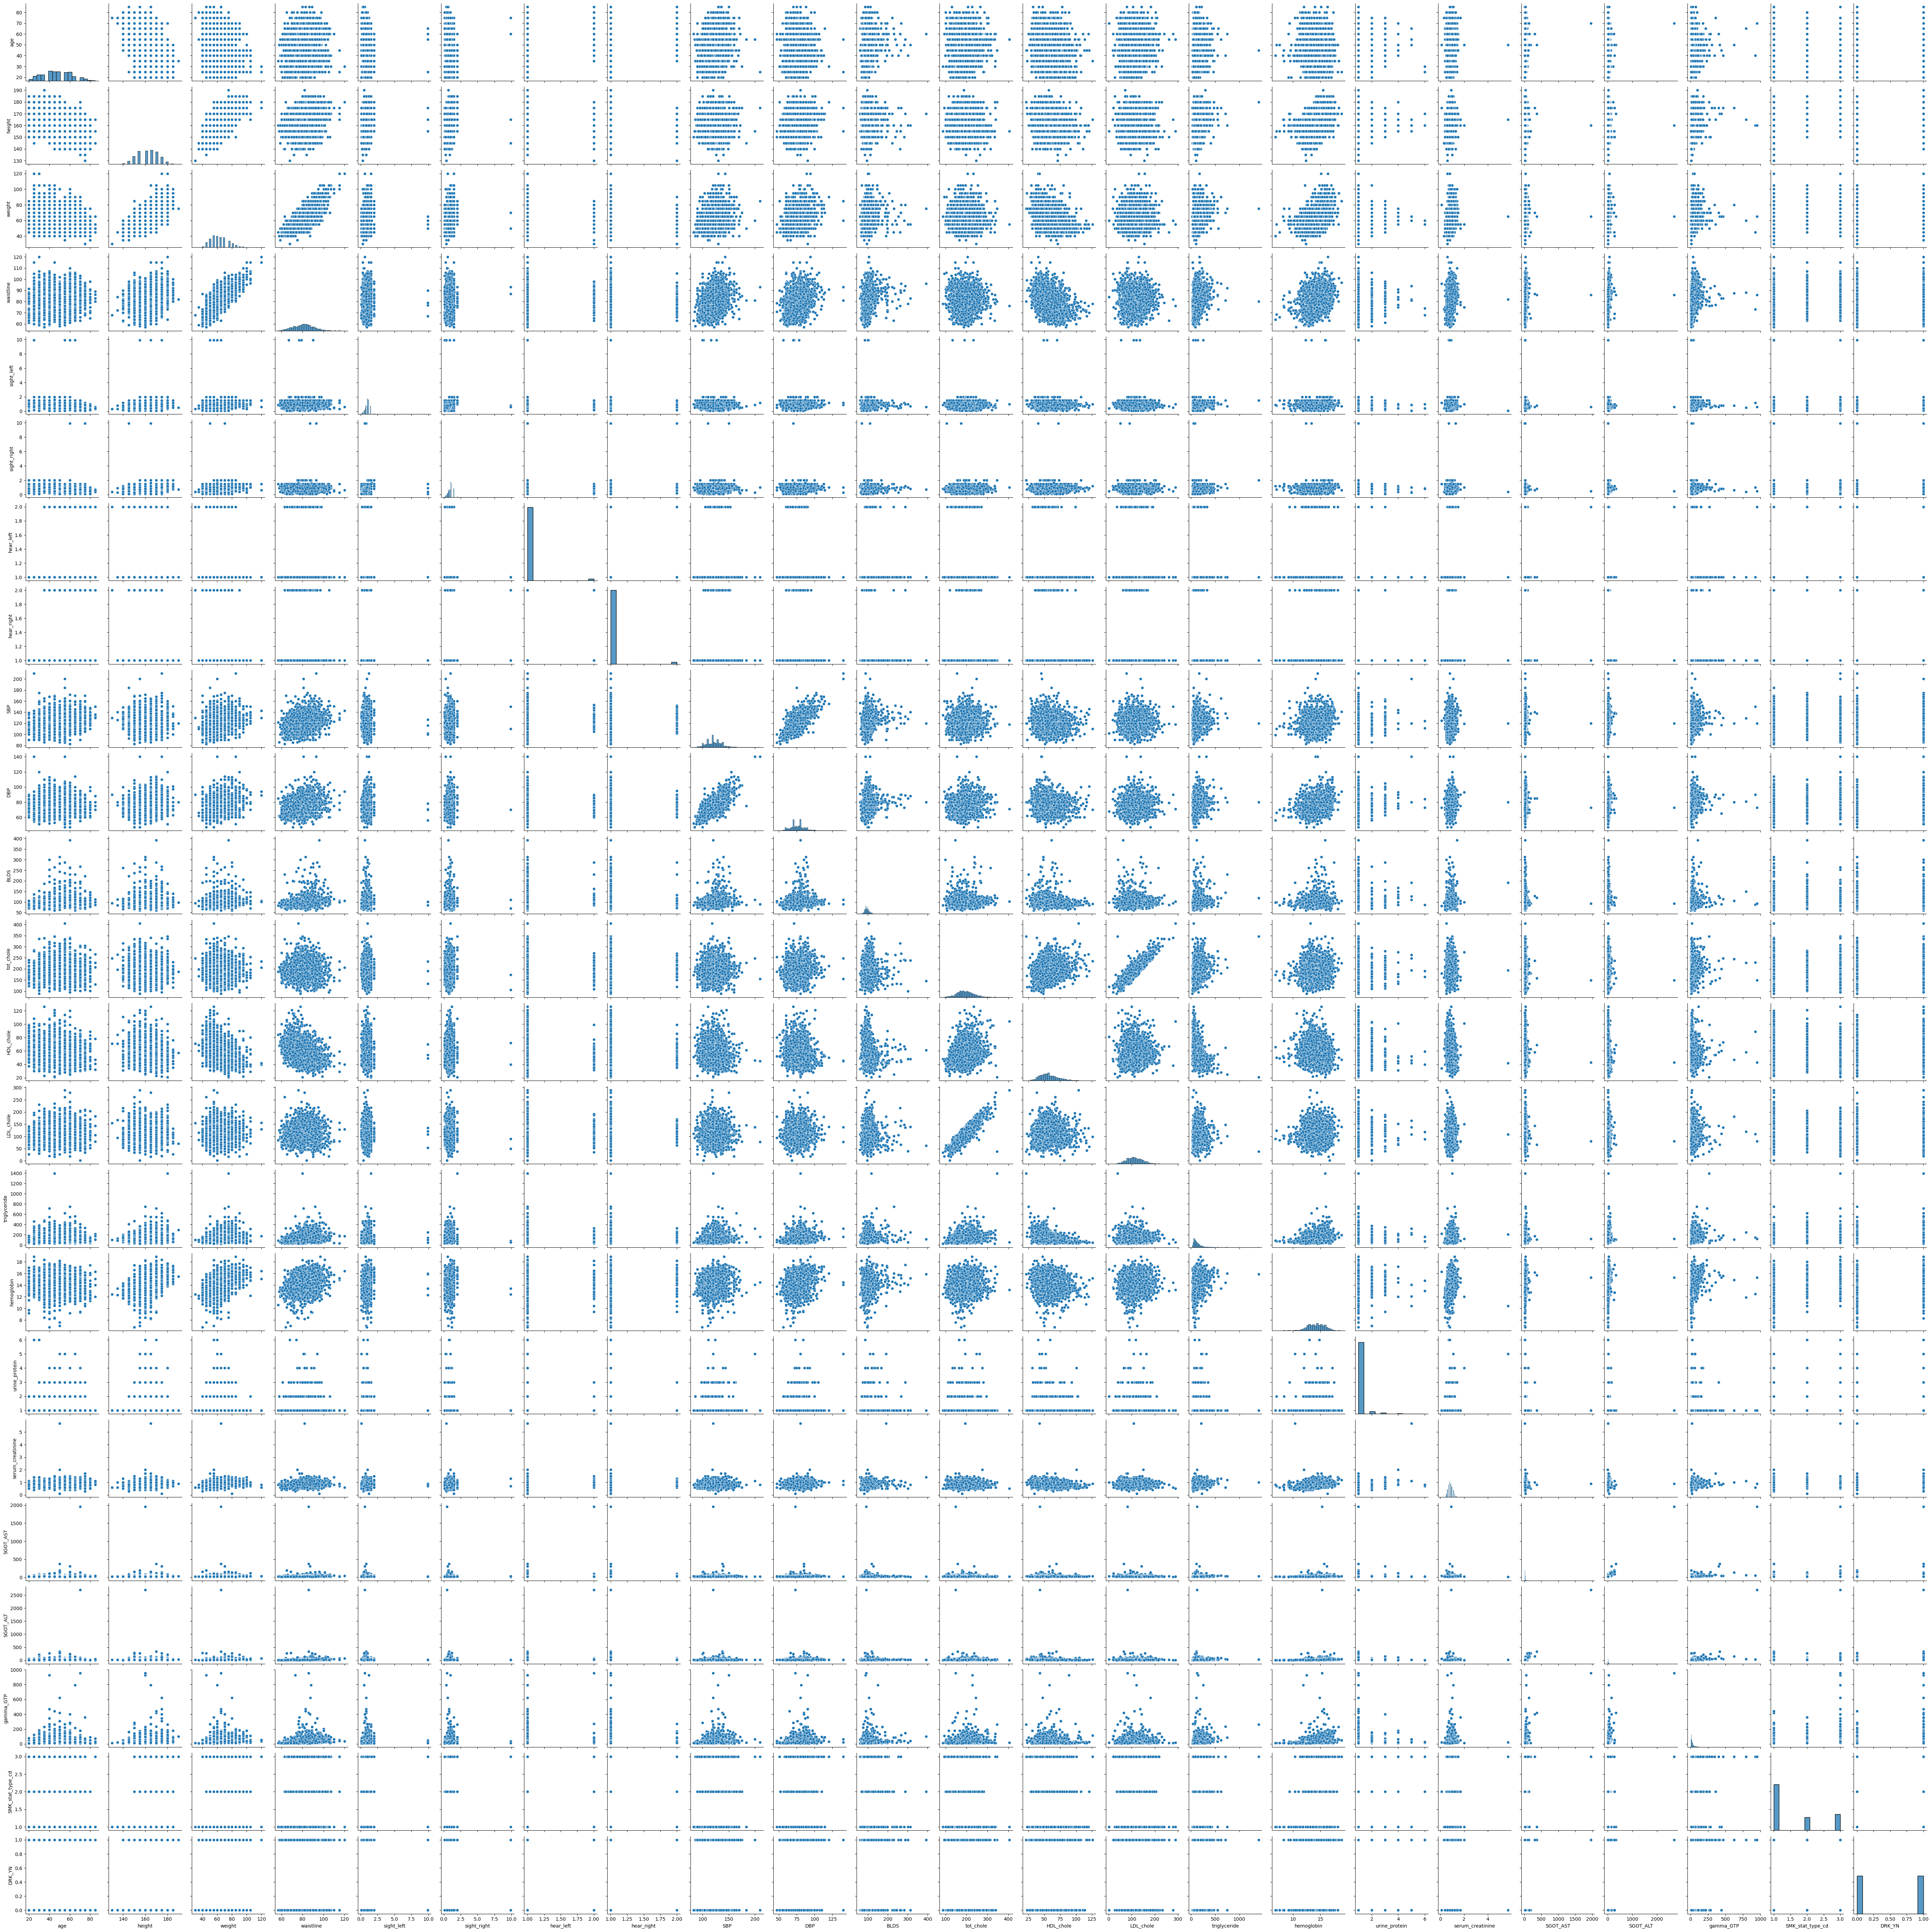

In [6]:
# Are the variables correlated?
# Choose 2000 random samples from the data
import seaborn as sns
N = 2000
sns.pairplot(doc.sample(N))


/var/folders/l4/cvtt5nrn021dbz6fwy92xdh00000gn/T/ipykernel_82795/303998012.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = doc.cov()


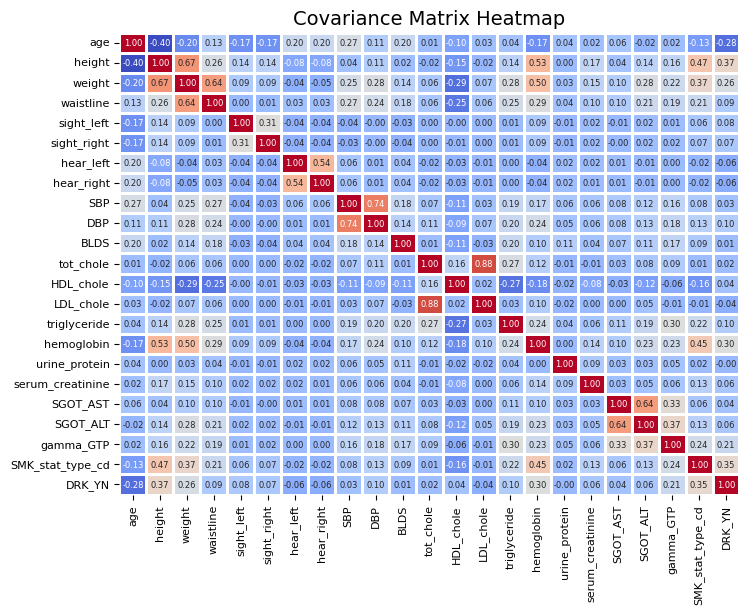

In [10]:
cov_matrix = doc.cov()
diagonal = np.sqrt(np.diag(cov_matrix))
normalized_cov_matrix = cov_matrix / (diagonal[:, np.newaxis] * diagonal)
figure(figsize=(8, 6))
sns.heatmap(normalized_cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=False,
            annot_kws={"size": 6})
title('Covariance Matrix Heatmap', fontsize=14)
xticks(fontsize=8)
yticks(fontsize=8)
show()